In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('census_income.csv')

In [5]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.duplicated().sum()

24

In [8]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [9]:
df=df.replace(' ?',np.NaN)

In [10]:
df.isin(['?','-','NA']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [11]:
df.drop_duplicates(keep='last', inplace=True)

<Axes: >

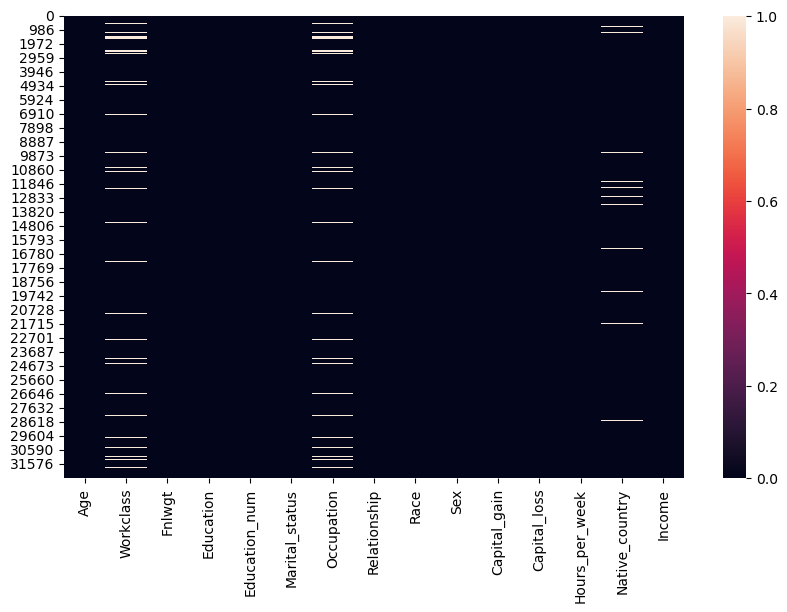

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [14]:
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [15]:
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [16]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


<Axes: >

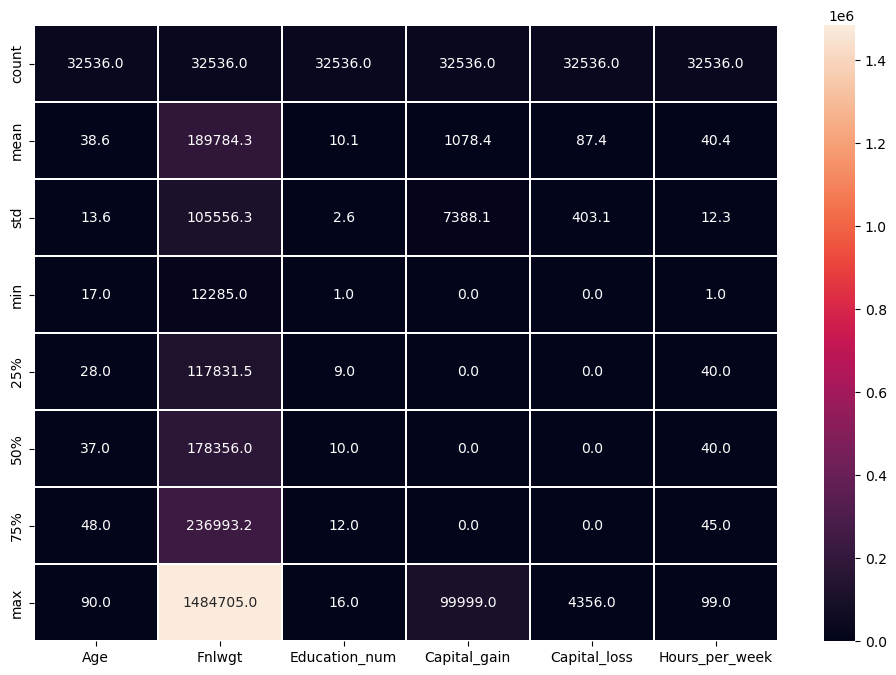

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

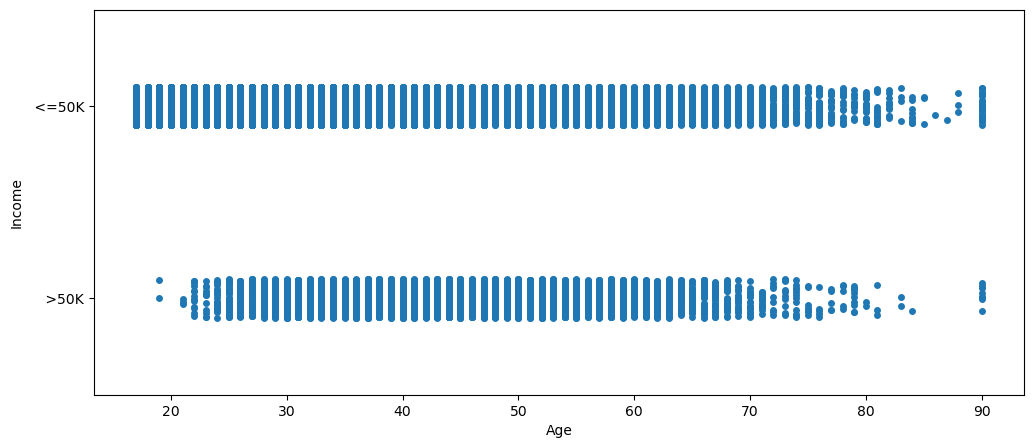

In [18]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Age', y = 'Income', data=df)
plt.show()

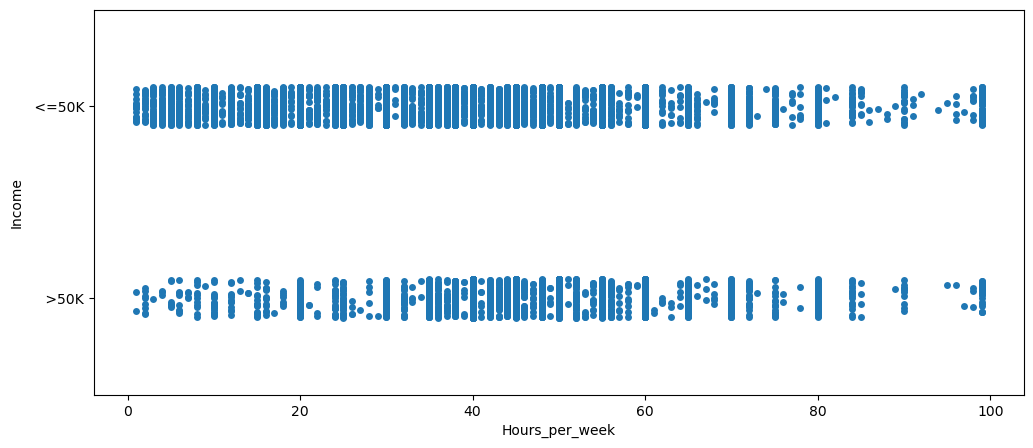

In [19]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Hours_per_week', y = 'Income', data=df)
plt.show()

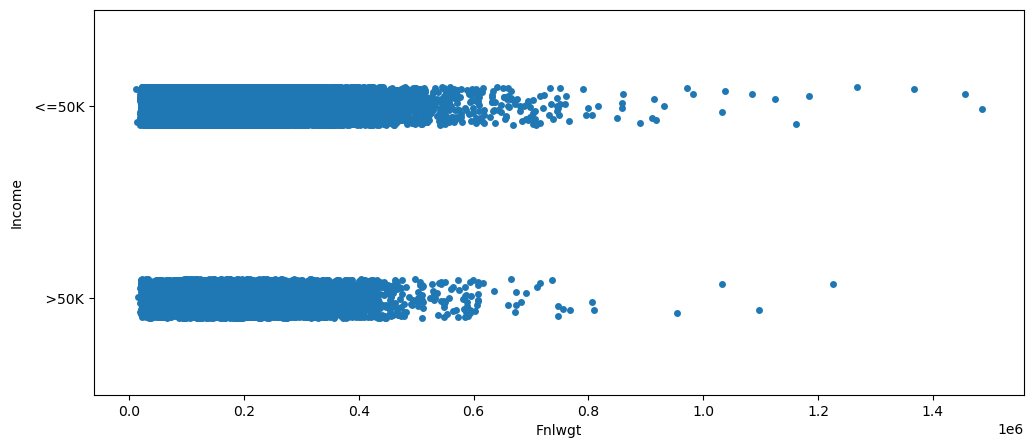

In [20]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Fnlwgt', y = 'Income', data=df)
plt.show()

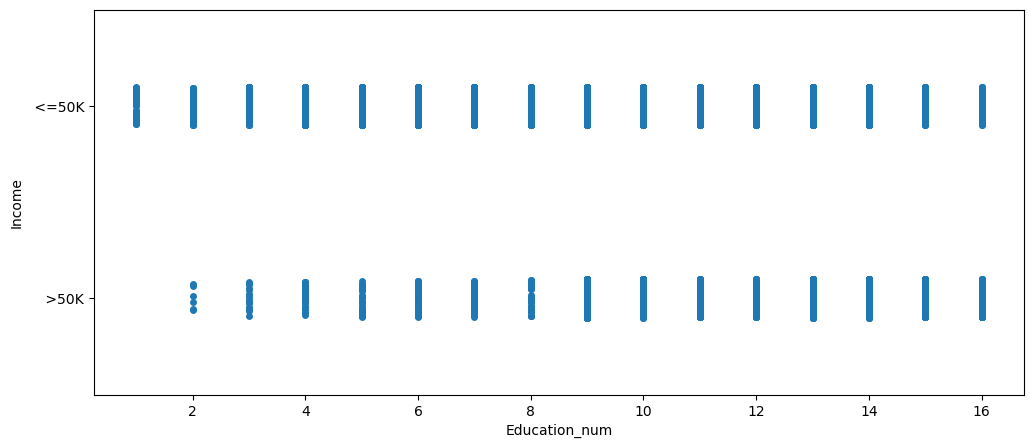

In [21]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Education_num', y = 'Income', data=df)
plt.show()

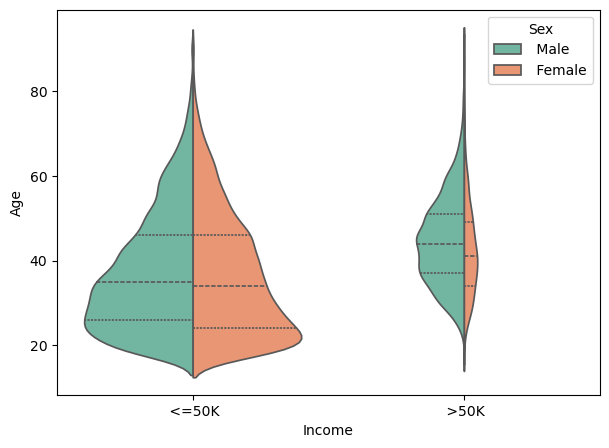

In [22]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Income", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In [23]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True)

Sex                 Female         Male          All
Income               <=50K  >50K  <=50K  >50K       
Occupation                                          
 Adm-clerical         2323   212    937   295   3767
 Armed-Forces            0     0      8     1      9
 Craft-repair          202    20   2963   909   4094
 Exec-managerial       879   280   1218  1688   4065
 Farming-fishing        63     2    814   113    992
 Handlers-cleaners     160     4   1123    82   1369
 Machine-op-inspct     529    20   1222   229   2000
 Other-service        1748    51   1406    86   3291
 Priv-house-serv       138     1      8     0    147
 Prof-specialty       1917   437   2013  1612   5979
 Protective-serv        66    10    372   201    649
 Sales                1175    88   1492   895   3650
 Tech-support          302    45    342   238    927
 Transport-moving       81     9   1196   311   1597
All                   9583  1179  15114  6660  32536

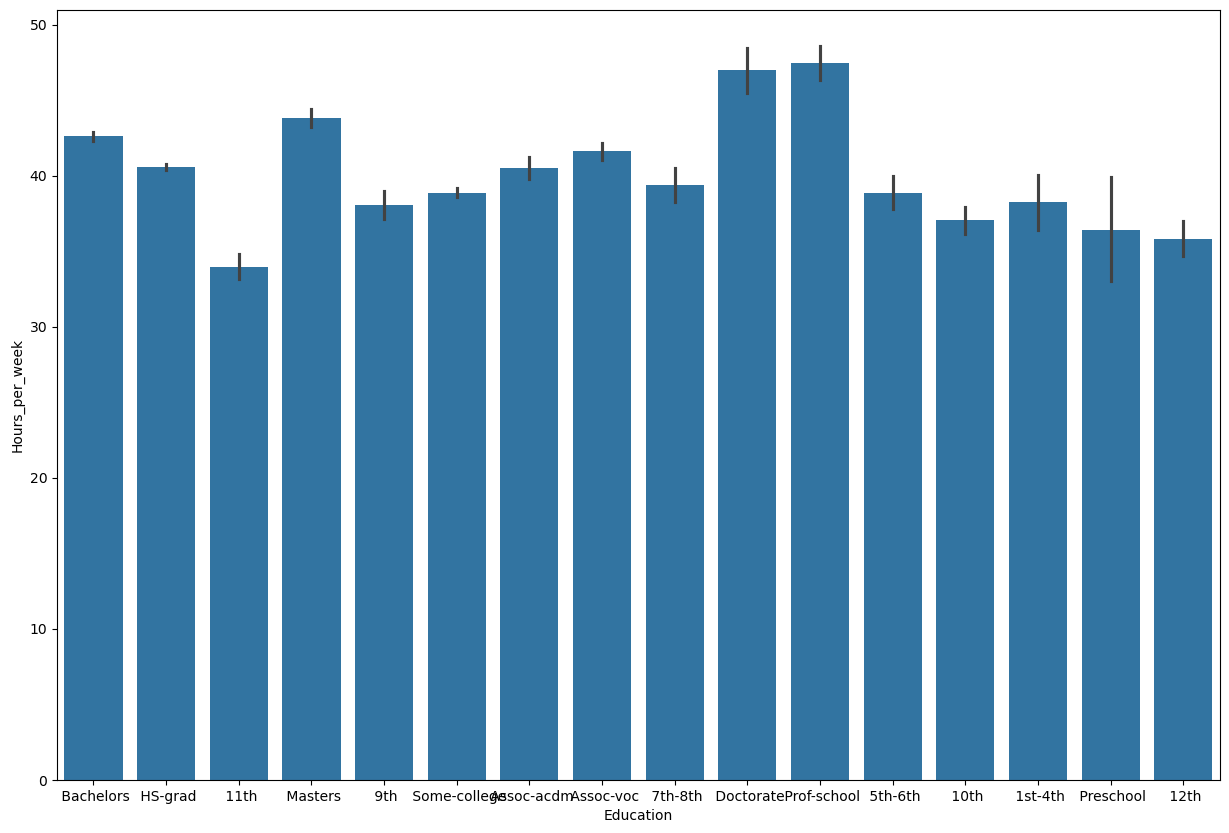

In [24]:
plt.figure(figsize=(15,10))
sns_grad = sns.barplot(x = df['Education'], y = df['Hours_per_week'], data = df)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])

In [27]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int32
 2   Fnlwgt          32536 non-null  int64
 3   Education       32536 non-null  int32
 4   Education_num   32536 non-null  int64
 5   Marital_status  32536 non-null  int32
 6   Occupation      32536 non-null  int32
 7   Relationship    32536 non-null  int32
 8   Race            32536 non-null  int32
 9   Sex             32536 non-null  int32
 10  Capital_gain    32536 non-null  int64
 11  Capital_loss    32536 non-null  int64
 12  Hours_per_week  32536 non-null  int64
 13  Native_country  32536 non-null  int32
 14  Income          32536 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.9 MB


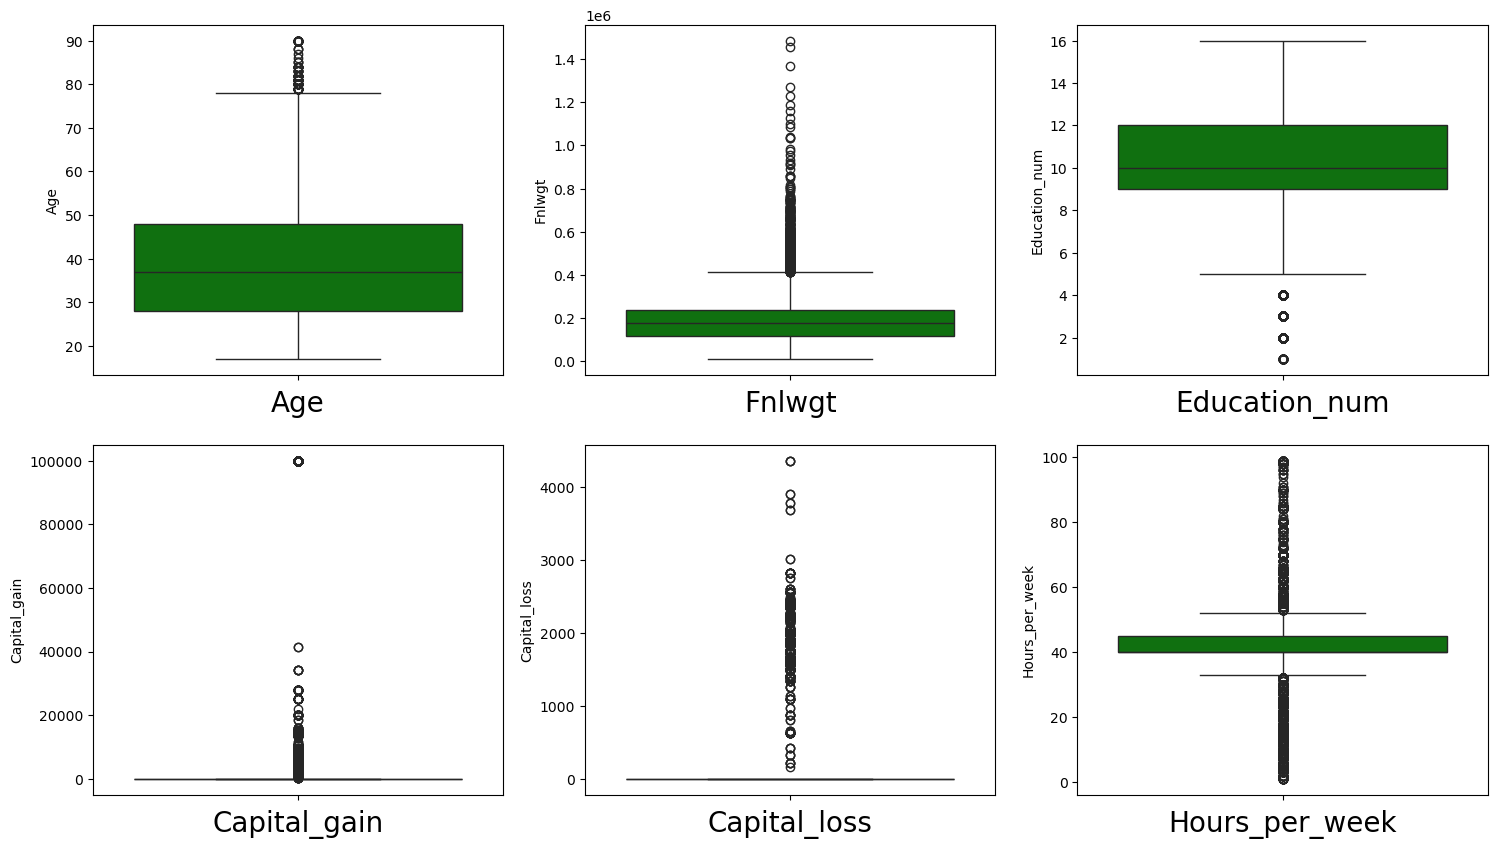

In [29]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [30]:
df.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

In [31]:
from scipy.stats import zscore

In [32]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [33]:
df=df1.copy()

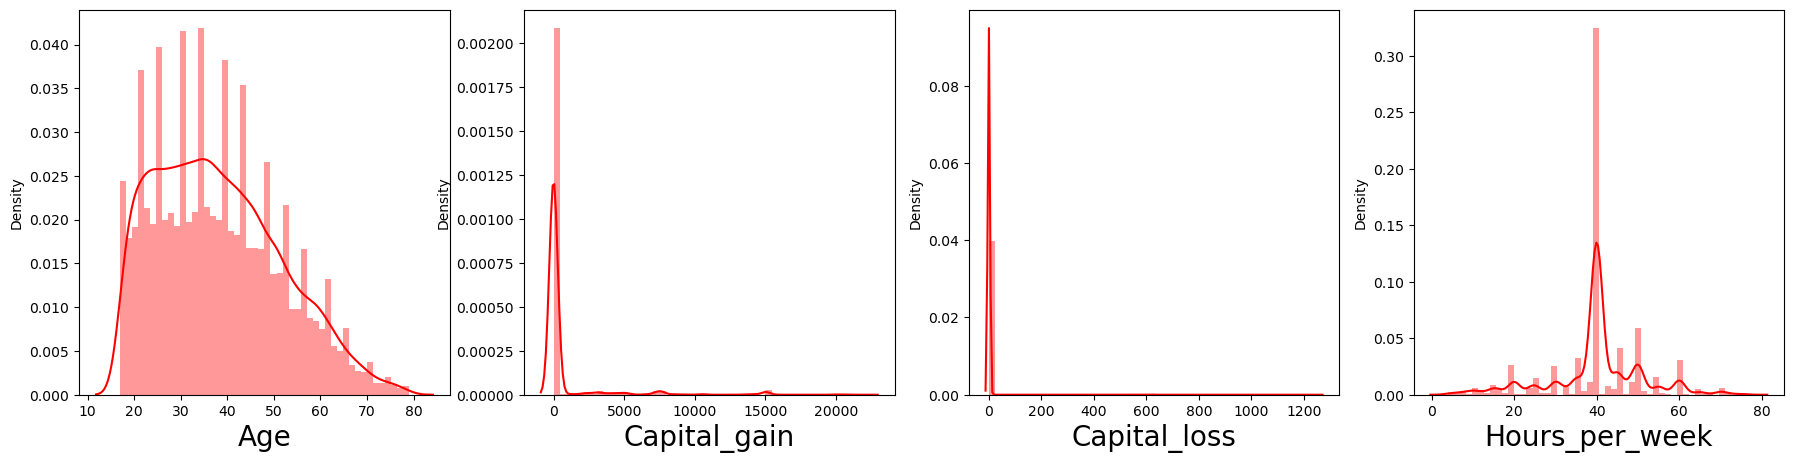

In [34]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [35]:
df.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

In [36]:
df.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.029674,0.045622,-0.286328,-0.001610,-0.270591,0.021292,0.089469,0.131998,0.023459,0.090783,0.037494,0.241844
Workclass,0.029674,1.000000,-0.002200,-0.015623,0.008779,-0.057823,0.067532,0.069617,0.011083,-0.010613,0.028104,0.001938,-0.007699
Education_num,0.045622,-0.002200,1.000000,-0.058587,0.073142,-0.092447,0.080766,0.003688,0.157858,0.007348,0.156303,0.149688,0.320271
Marital_status,-0.286328,-0.015623,-0.058587,1.000000,0.036477,0.183248,-0.084558,-0.125361,-0.069601,-0.016396,-0.196053,-0.032575,-0.194146
Occupation,-0.001610,0.008779,0.073142,0.036477,1.000000,-0.038735,0.000613,0.051055,0.009446,-0.004779,-0.022194,0.018069,0.030664
Relationship,-0.270591,-0.057823,-0.092447,0.183248,-0.038735,1.000000,-0.146432,-0.577195,-0.089095,0.030105,-0.261919,-0.011274,-0.248263
Race,0.021292,0.067532,0.080766,-0.084558,0.000613,-0.146432,1.000000,0.122731,0.031333,0.000186,0.055486,0.018660,0.094756
Sex,0.089469,0.069617,0.003688,-0.125361,0.051055,-0.577195,0.122731,1.000000,0.069539,-0.027323,0.236168,-0.011189,0.211792
Capital_gain,0.131998,0.011083,0.157858,-0.069601,0.009446,-0.089095,0.031333,0.069539,1.000000,-0.009077,0.098705,0.019185,0.343487
Capital_loss,0.023459,-0.010613,0.007348,-0.016396,-0.004779,0.030105,0.000186,-0.027323,-0.009077,1.000000,-0.003440,0.002925,-0.016465


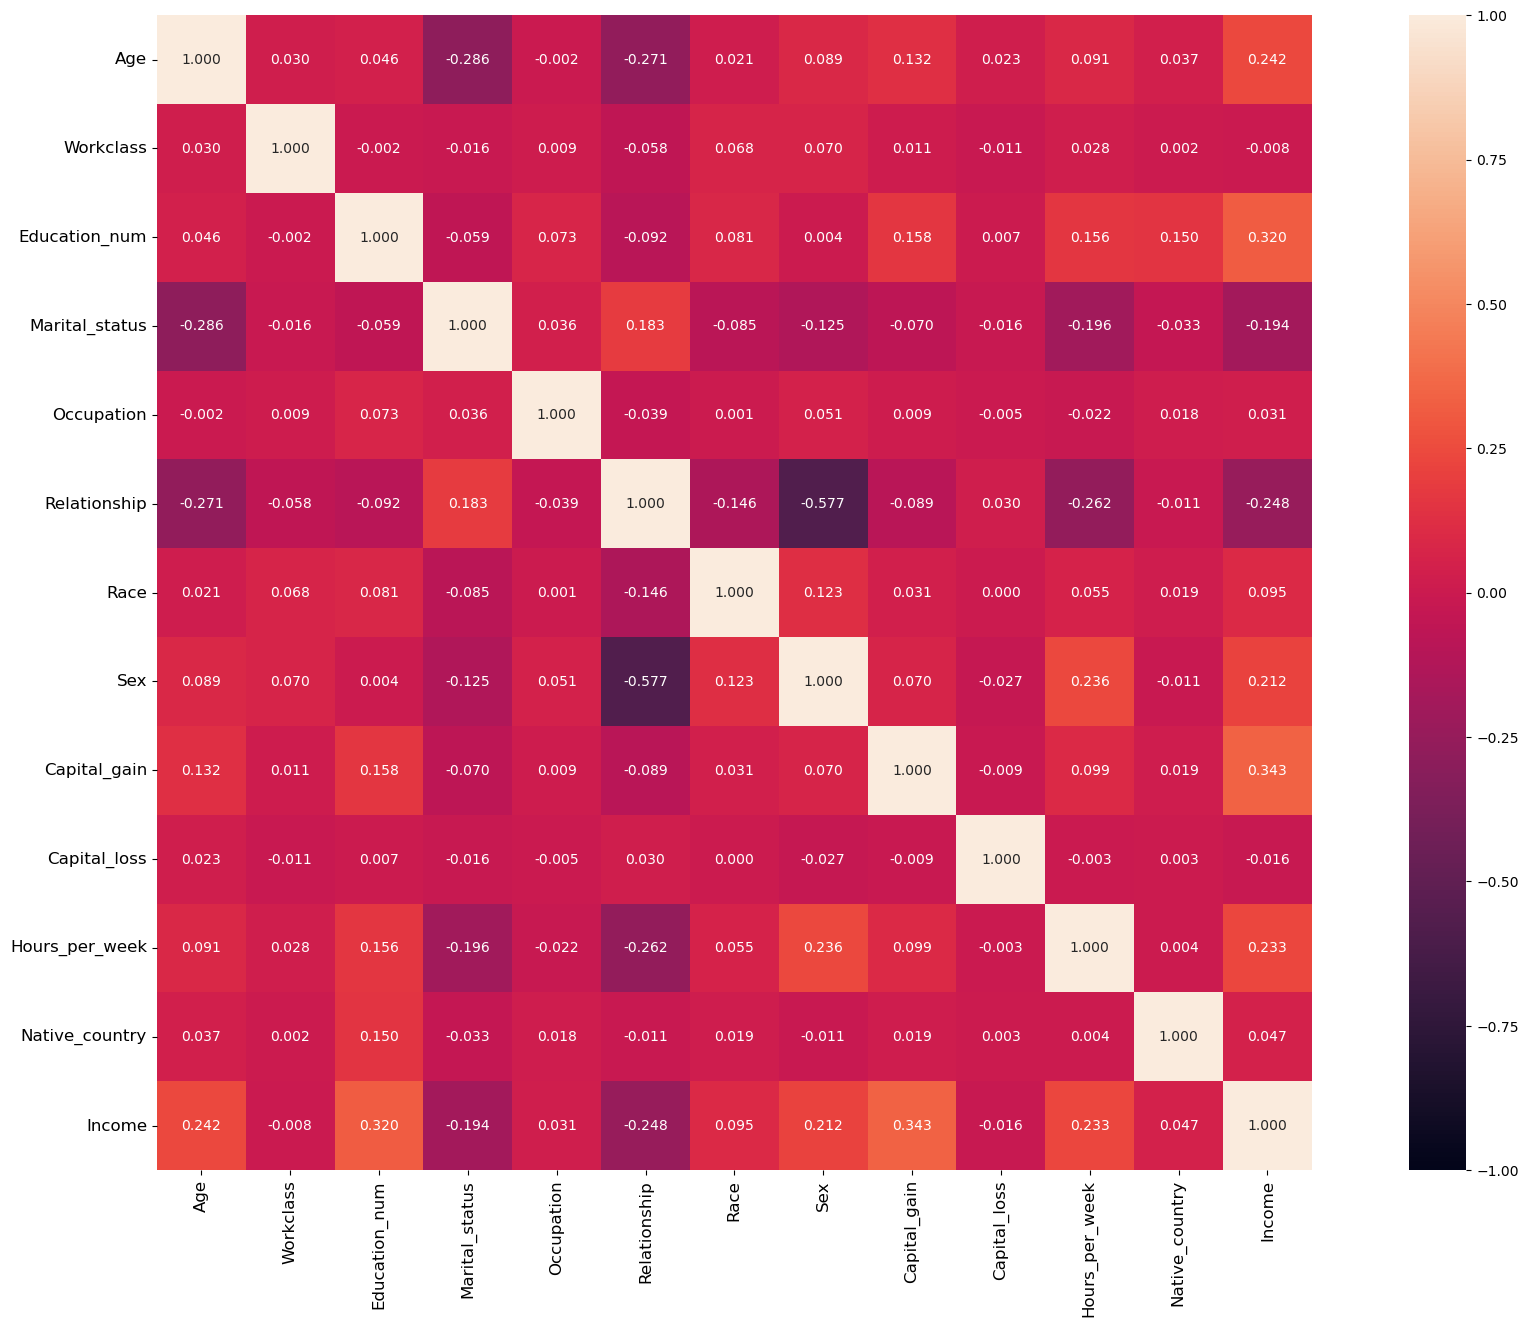

In [37]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,10.452897,Age
1,8.807425,Workclass
2,21.287850,Education_num
3,4.358505,Marital_status
4,3.357557,Occupation
5,2.937270,Relationship
6,36.291318,Race
7,4.566872,Sex
8,1.209589,Capital_gain
9,1.004295,Capital_loss


In [40]:
df.Income.value_counts()

Income
0    21767
1     6294
Name: count, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [43]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [44]:
Y.value_counts()

Income
0    21767
1    21767
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [47]:
from sklearn.decomposition import PCA

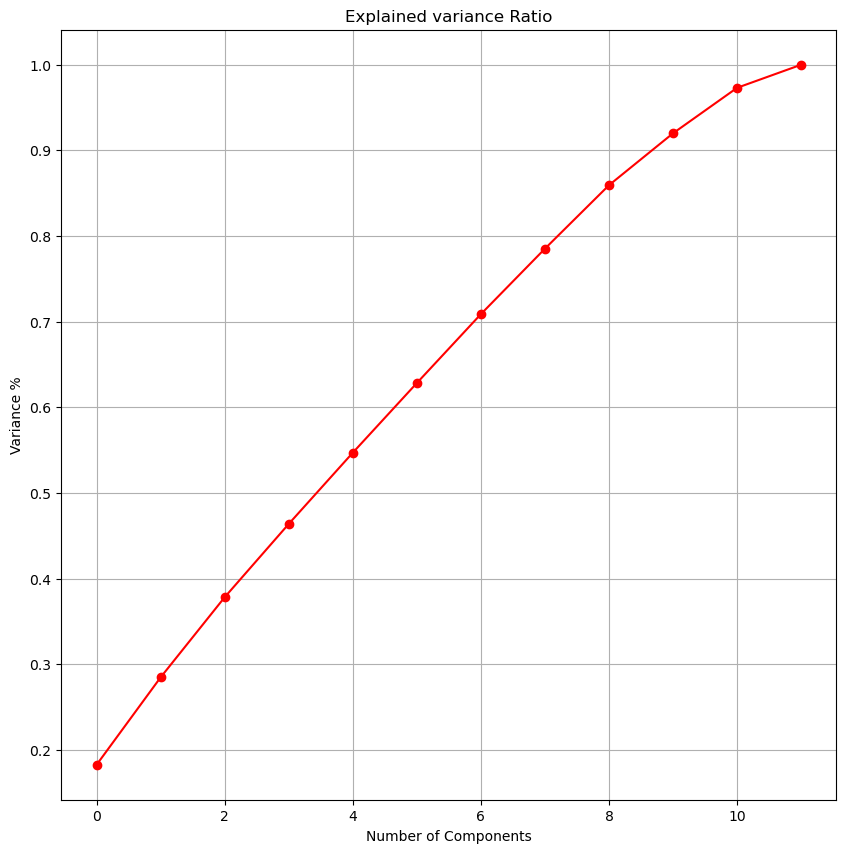

In [48]:
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [49]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [50]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [52]:
x_new

array([[-0.33814813, -0.23024688,  0.01487319, ..., -1.05965074,
         0.37897538,  1.10648927],
       [-0.69826056, -0.32817031,  0.83214842, ..., -0.53655981,
        -0.51791869, -0.45837192],
       [-0.05472691, -0.84498948,  2.05577006, ..., -1.45981298,
         2.08756506, -0.91493413],
       ...,
       [-1.08499877,  0.1562615 , -1.12380074, ..., -0.56845067,
        -0.51988155, -0.18234578],
       [-0.91703879, -0.68506246,  0.42804032, ...,  0.32840576,
         0.27401831, -0.09833427],
       [-1.73526496,  0.3857604 , -0.77743775, ..., -0.54253438,
        -0.5028581 , -0.55370191]])

In [53]:
principle_x

,0,1,2,3,4,5,6,7,8
0,-0.338148,-0.230247,0.014873,1.506514,-0.503828,1.202408,-1.059651,0.378975,1.106489
1,-0.698261,-0.328170,0.832148,0.654911,-0.107182,-0.368304,-0.536560,-0.517919,-0.458372
2,-0.054727,-0.844989,2.055770,-1.502725,0.602987,0.542222,-1.459813,2.087565,-0.914934
3,1.815091,1.920685,-0.106213,0.966322,-0.721148,-0.435061,0.708709,-0.649679,-0.857013
4,3.173526,-2.956136,3.772716,-3.024857,1.214411,4.409452,1.489274,-1.593114,-0.549073
...,...,...,...,...,...,...,...,...,...
43529,-0.874016,0.582622,0.759760,-0.990705,-0.209961,-1.327838,0.594337,-0.169439,1.379391
43530,-2.388956,1.403560,0.319020,0.683854,-1.187908,1.877048,1.047051,1.364889,1.056482
43531,-1.084999,0.156262,-1.123801,-0.219126,0.582187,0.193820,-0.568451,-0.519882,-0.182346
43532,-0.917039,-0.685062,0.428040,0.385931,-0.378507,-0.934408,0.328406,0.274018,-0.098334


In [54]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7732945409999235 on Random_state 120


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=120, test_size=.3)

In [57]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7732945409999235


Confusion matrix of Logistics Regression : 
 [[4944 1587]
 [1374 5156]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      6531
           1       0.76      0.79      0.78      6530

    accuracy                           0.77     13061
   macro avg       0.77      0.77      0.77     13061
weighted avg       0.77      0.77      0.77     13061



In [58]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

In [59]:
rmse_val = [] 
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 0.39062985698687813
RMSE value for k=  2 is: 0.41707671934191254
RMSE value for k=  3 is: 0.3900414109731752
RMSE value for k=  4 is: 0.40221802928568384
RMSE value for k=  5 is: 0.3924874490636102
RMSE value for k=  6 is: 0.39665935228846577
RMSE value for k=  7 is: 0.39219472998070515
RMSE value for k=  8 is: 0.3951121621803812
RMSE value for k=  9 is: 0.3925849735896683
RMSE value for k=  10 is: 0.39287740191594417
RMSE value for k=  11 is: 0.3941420842075228
RMSE value for k=  12 is: 0.39839275902661153


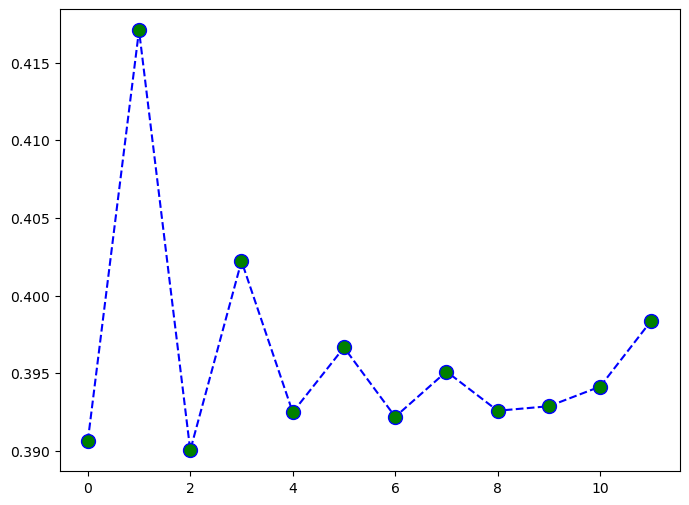

In [60]:
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

In [61]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7732945409999235


Confusion matrix : 
 [[4944 1587]
 [1374 5156]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      6531
           1       0.76      0.79      0.78      6530

    accuracy                           0.77     13061
   macro avg       0.77      0.77      0.77     13061
weighted avg       0.77      0.77      0.77     13061



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8271189036061557


Confusion matrix : 
 [[4896 1635]
 [ 623 5907]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      6531
           1       0.78      0.90      0.84      6530

    accuracy                           0.83     13061
   macro avg       0.84      0.83      0.83     13061
weighted avg       0.84      0.83      0

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

In [64]:
for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('==============================')



Cross Validation Score LogisticRegression() :

Score : [0.7612266  0.76616515 0.761686   0.76478695 0.76969906]
Mean Score : 0.7647127529357556
Std deviation : 0.0031078197264202963




Cross Validation Score SVC() :

Score : [0.81440221 0.82152291 0.82749512 0.82221201 0.83471169]
Mean Score : 0.8240687885998182
Std deviation : 0.006758447901314114




Cross Validation Score GaussianNB() :

Score : [0.69805903 0.71184105 0.7176984  0.70770644 0.71858488]
Mean Score : 0.7107779622116455
Std deviation : 0.007499014302580636




Cross Validation Score DecisionTreeClassifier() :

Score : [0.79935684 0.81428736 0.83473068 0.83346733 0.83620492]
Mean Score : 0.8236094224168176
Std deviation : 0.01452305565421014




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.8109567  0.83461583 0.8535661  0.85023544 0.85389387]
Mean Score : 0.8406535866283749
Std deviation : 0.016445117283276856




Cross Validation Score RandomForestClassifier() :

Score : [0.83507523 0.8509

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [10, 15, 20]
             }

In [67]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10;, score=0.841 total time=   0.4s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10;, score=0.842 total time=   0.3s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10;, score=0.834 total time=   0.3s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10;, score=0.840 total time=   0.2s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10
[CV 5/5; 1/54] END cri

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [10, 15, 20]},
             verbose=10)

In [68]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'min_samples_split': 8,
 'n_estimators': 20}

In [69]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 20, max_depth=40 ,min_samples_split= 8)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8601944720924891


In [71]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

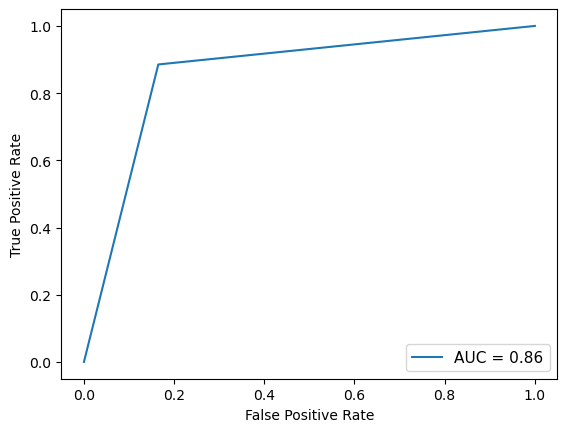

In [72]:
fpr,tpr,threshold=roc_curve(Y_test,y_pred)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()  
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [73]:
import joblib
joblib.dump(Final_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']

In [74]:
model=joblib.load("Census_Income_Final.pkl")
prediction=model.predict(X_test)
prediction

array([1, 0, 1, ..., 0, 1, 0])

In [75]:
a=np.array(Y_test)
df1=pd.DataFrame()
df1['Predicted']=prediction
df1['Actual']=a
df1

,Predicted,Actual
0,1,1
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
13056,1,1
13057,1,1
13058,0,0
13059,1,1
